# Seismic Activity Analysis in Italy Based on INGV Data (May–June 2024)

In [1]:
import pandas as pd

df = pd.read_csv("path_to/data/earthquakes.cvs", sep='|')
df["Time"] = pd.to_datetime(df["Time"], errors='coerce')
df["Date"] = df["Time"].dt.date
df["Hour"] = df["Time"].dt.hour
df.head()

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,EventType,Date,Hour
0,38941271,2024-05-30 00:16:07.190,39.3317,17.0633,32.3,SURVEY-INGV,NaN,NaN,NaN,ML,2.3,--,4 km NE Melissa (KR),earthquake,2024-05-30,0
1,38945531,2024-05-30 07:10:16.990,42.2958,13.6172,9.6,SURVEY-INGV,NaN,NaN,NaN,ML,2.1,--,2 km NE Prata d'Ansidonia (AQ),earthquake,2024-05-30,7
2,38946651,2024-05-30 08:19:13.150,44.6443,10.2343,19.9,SURVEY-INGV,NaN,NaN,NaN,ML,2.3,--,4 km NW Langhirano (PR),earthquake,2024-05-30,8
3,38955661,2024-05-30 18:30:44.330,39.5077,15.5887,277.0,SURVEY-INGV,NaN,NaN,NaN,ML,2.7,--,Costa Calabra nord-occidentale (Cosenza),earthquake,2024-05-30,18
4,38956581,2024-05-30 20:30:56.120,45.6412,9.5578,24.2,SURVEY-INGV,NaN,NaN,NaN,ML,2.0,--,Filago (BG),earthquake,2024-05-30,20


In [2]:
# data cleaning

df = pd.read_csv("../data/earthquakes.cvs", sep='|')

df["Time"] = pd.to_datetime(df["Time"], errors='coerce')

df["Date"] = df["Time"].dt.date
df["Hour"] = df["Time"].dt.hour
df["Data"] = df["Time"].dt.strftime("%Y-%m-%d")
df["Ora"] = df["Time"].dt.strftime("%H:%M:%S")

df = df.drop(columns=["Time"])

colonne_da_rimuovere = ["Catalog", "Contributor", "ContributorID", "Author", "MagAuthor", "EventType"]
df = df.drop(columns=colonne_da_rimuovere)

df.head()

,#EventID,Latitude,Longitude,Depth/Km,MagType,Magnitude,EventLocationName,Date,Hour,Data,Ora
0,38941271,39.3317,17.0633,32.3,ML,2.3,4 km NE Melissa (KR),2024-05-30,0,2024-05-30,00:16:07
1,38945531,42.2958,13.6172,9.6,ML,2.1,2 km NE Prata d'Ansidonia (AQ),2024-05-30,7,2024-05-30,07:10:16
2,38946651,44.6443,10.2343,19.9,ML,2.3,4 km NW Langhirano (PR),2024-05-30,8,2024-05-30,08:19:13
3,38955661,39.5077,15.5887,277.0,ML,2.7,Costa Calabra nord-occidentale (Cosenza),2024-05-30,18,2024-05-30,18:30:44
4,38956581,45.6412,9.5578,24.2,ML,2.0,Filago (BG),2024-05-30,20,2024-05-30,20:30:56


## Descriptive Statistics for Magnitude and Depth

In [3]:
print("Magnitude:")
print("Mean:", df["Magnitude"].mean())
print("Max:", df["Magnitude"].max())
print("Min:", df["Magnitude"].min())

print("\nDepth (Km):")
print("Mean:", df["Depth/Km"].mean())
print("Max:", df["Depth/Km"].max())
print("Min:", df["Depth/Km"].min())

Magnitude:
Mean: 2.4114898295766904
Max: 5.0
Min: 2.0

Depth (Km):
Mean: 26.829851566794943
Max: 334.6
Min: 0.0


## Daily Event Count

<Axes: title={'center': 'Daily Event Count'}, xlabel='Data', ylabel='Number of Events'>

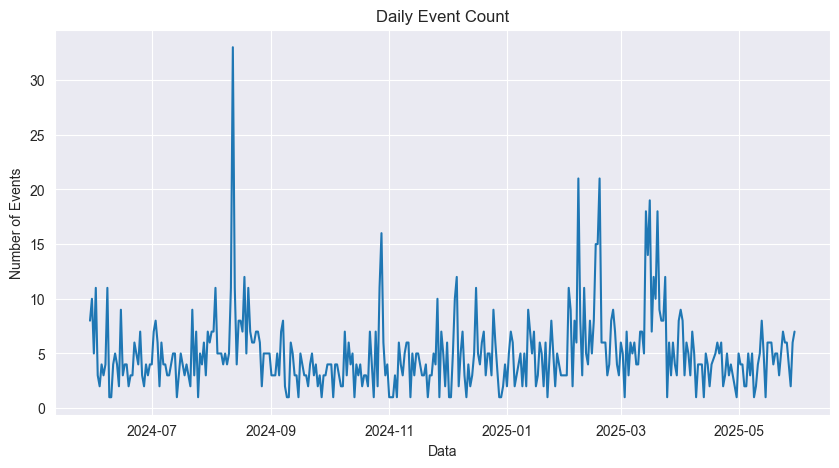

In [4]:
eventi_per_giorno = df["Date"].value_counts().sort_index()
eventi_per_giorno.plot(kind='line', title="Daily Event Count", xlabel="Data", ylabel="Number of Events", figsize=(10,5), grid=True)

## Distribution of Events by Hour of the Day

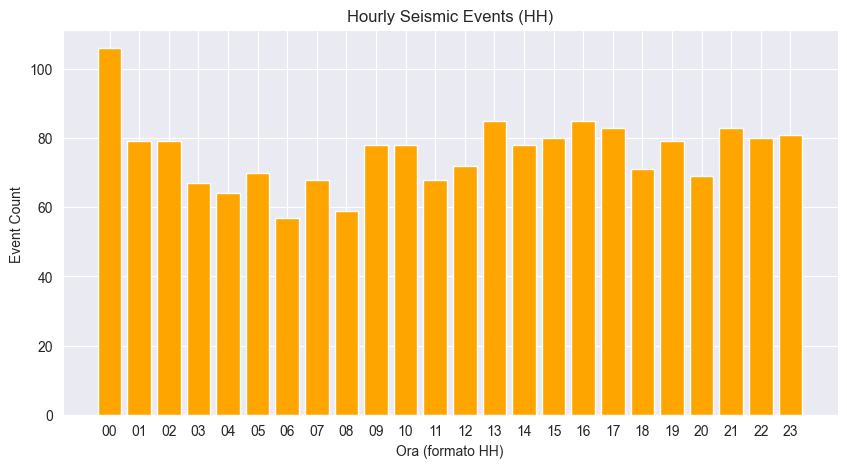

In [5]:
import matplotlib.pyplot as plt

df["Ora_HH"] = df["Ora"].str.slice(0, 2)
eventi_per_ora_hh = df["Ora_HH"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(eventi_per_ora_hh.index, eventi_per_ora_hh.values, color='orange')
plt.title("Hourly Seismic Events (HH)")
plt.xlabel("Ora (formato HH)")
plt.ylabel("Event Count ")
plt.grid(True)
plt.show()

## Daily Event Trend (Rolling Mean)

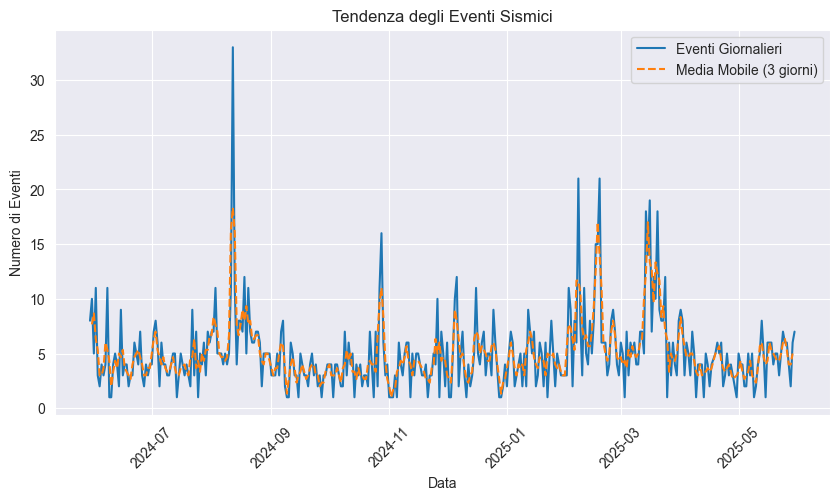

In [6]:
rolling_mean = eventi_per_giorno.rolling(window=3, center=True).mean()
plt.figure(figsize=(10,5))
plt.plot(eventi_per_giorno.index, eventi_per_giorno.values, label="Eventi Giornalieri")
plt.plot(rolling_mean.index, rolling_mean.values, label="Media Mobile (3 giorni)", linestyle="--")
plt.title("Tendenza degli Eventi Sismici")
plt.xlabel("Data")
plt.ylabel("Numero di Eventi")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

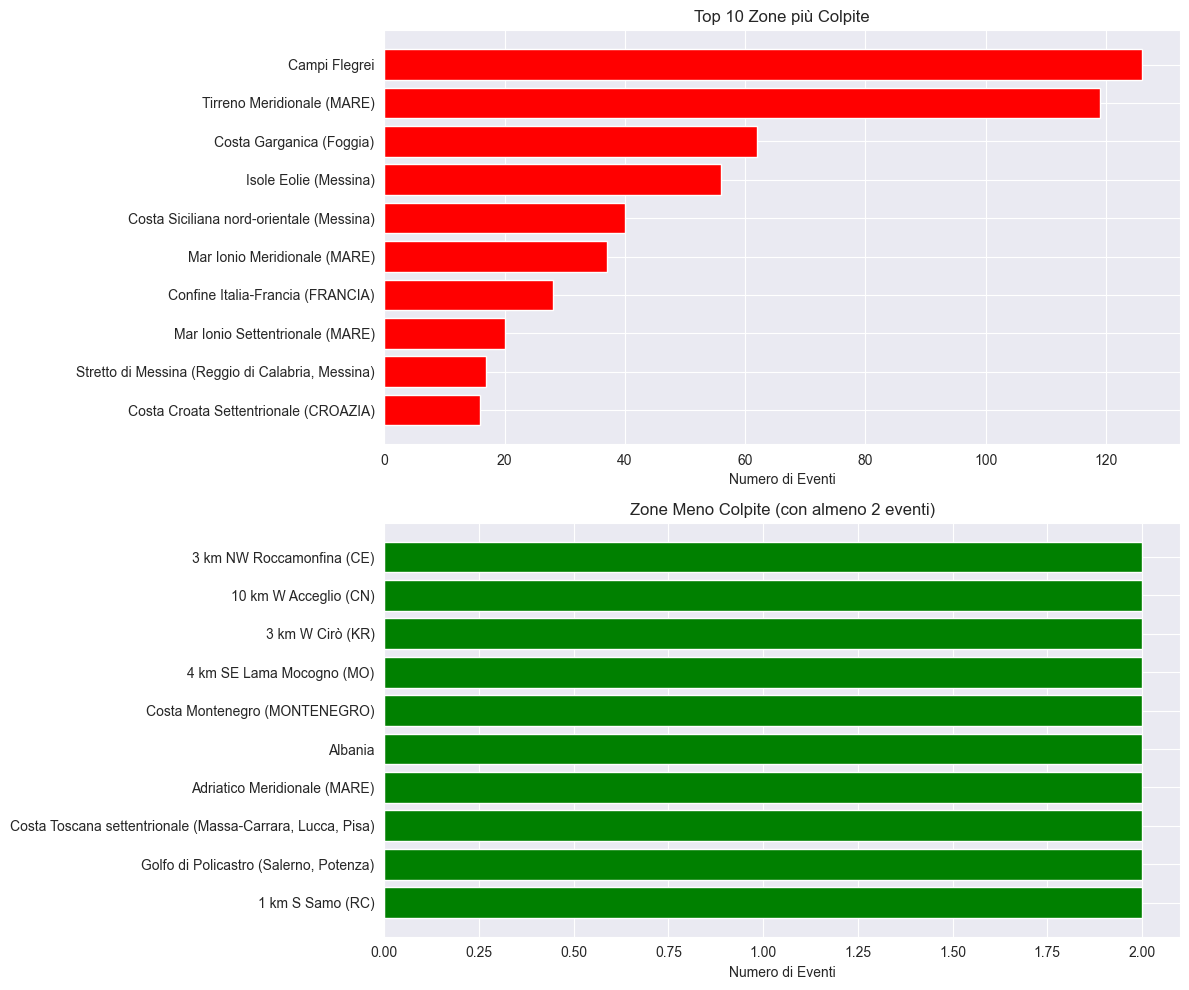

In [7]:
# Analisi delle zone
localita_eventi = df["EventLocationName"].value_counts()


top_10_zone = localita_eventi.head(10)

bottom_10_zone = localita_eventi[localita_eventi > 1].tail(10)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 10))


axs[0].barh(top_10_zone.index[::-1], top_10_zone.values[::-1], color='red')
axs[0].set_title("Top 10 Zone più Colpite")
axs[0].set_xlabel("Numero di Eventi")
axs[0].grid(True)

axs[1].barh(bottom_10_zone.index[::-1], bottom_10_zone.values[::-1], color='green')
axs[1].set_title("Zone Meno Colpite (con almeno 2 eventi)")
axs[1].set_xlabel("Numero di Eventi")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
## 🌍 Mappa Interattiva degli Eventi Sismici

In [9]:
import folium
from folium.plugins import MarkerCluster

#  mappa centrata sull’Italia
mappa = folium.Map(location=[42.5, 12.5], zoom_start=5)


cluster = MarkerCluster().add_to(mappa)

# i marker degli eventi
for _, row in df.iterrows():
    popup_info = (
        f"<b>Data:</b> {row['Data']}<br>"
        f"<b>Ora:</b> {row['Ora']}<br>"
        f"<b>Magnitudo:</b> {row['Magnitude']}<br>"
        f"<b>Profondità:</b> {row['Depth/Km']} km<br>"
        f"<b>Località:</b> {row['EventLocationName']}"
    )
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3 + row['Magnitude'],  # ingrandisce in base alla magnitudo
        color="red" if row['Magnitude'] >= 4.0 else "blue",
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_info, max_width=300)
    ).add_to(cluster)

# mappa in  HTML
mappa.save("mappa_eventi_sismici.html")

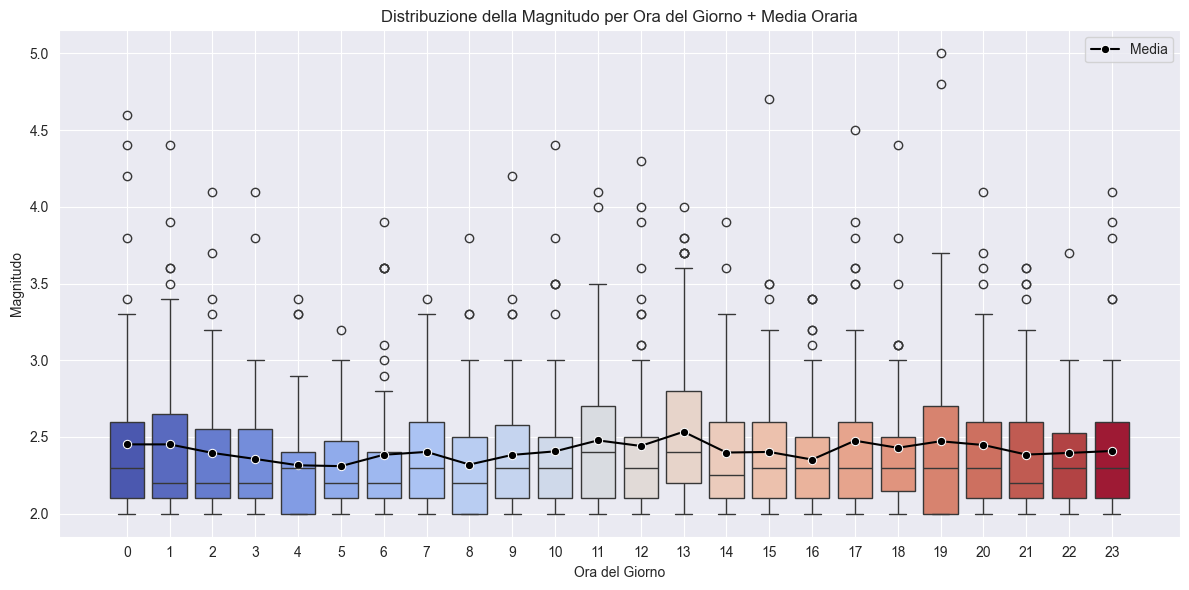

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Boxplot della magnitudo per ora del giorno
sns.boxplot(x="Hour", y="Magnitude", hue="Hour", data=df, palette="coolwarm", legend=False)

# Calcolo media per ora
media_per_ora = df.groupby("Hour")["Magnitude"].mean().reset_index()

# Sovrapposizione linea della media
sns.lineplot(x="Hour", y="Magnitude", data=media_per_ora, color="black", marker="o", label="Media")

plt.title("Magnitude Distribution by Hour of the Day + Hourly Average")
plt.xlabel("Ora del Giorno")
plt.ylabel("Magnitudo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()